In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
# from datetime import timedelta

# Process csat score data

In [2]:
csat_score_df = pd.read_csv('csat_score_data.csv')

In [3]:
csat_score_df.head()

,LEASE_ID,CSAT_RATING,ATLAS_REGION,BEDROOMS,BATHROOMS,FIRST_LEASE_APPROVED_AT,LEASE_START,LEAD_DAYS,BOOKING_TYPE,LOS,SOURCE_CATEGORY,HAS_EXTENSION,HAS_RELOCATION
0,1,5,San Francisco,0,1.0,2020-02-27 07:04:04.176 +0000,2020-03-04,7,Regular,9,Repeat,0,0
1,2,4,Seattle,3,2.5,2020-02-26 18:32:53.664 +0000,2020-03-03,6,Instant Fully Paid,31,Search,0,0
2,3,5,San Francisco,1,1.0,2020-03-01 02:03:53.280 +0000,2020-03-04,5,Regular,33,B2B,0,0
3,4,5,Los Angeles,1,1.0,2020-02-29 03:30:47.240 +0000,2020-03-08,9,Regular,329,B2B,1,0
4,5,5,Los Angeles,2,2.0,2020-02-29 20:02:58.692 +0000,2020-03-07,7,Instant Fully Paid,33,Paid Ads,0,0


In [4]:
# Calculate lease end date, and transfer the lease end date into year-month format
csat_score_df["LEASE_END"] = (
    pd.to_datetime(csat_score_df["LEASE_START"]) + pd.to_timedelta(csat_score_df["LOS"], unit="D")
).dt.to_period('M')
csat_score_df.head()

,LEASE_ID,CSAT_RATING,ATLAS_REGION,BEDROOMS,BATHROOMS,FIRST_LEASE_APPROVED_AT,LEASE_START,LEAD_DAYS,BOOKING_TYPE,LOS,SOURCE_CATEGORY,HAS_EXTENSION,HAS_RELOCATION,LEASE_END
0,1,5,San Francisco,0,1.0,2020-02-27 07:04:04.176 +0000,2020-03-04,7,Regular,9,Repeat,0,0,2020-03
1,2,4,Seattle,3,2.5,2020-02-26 18:32:53.664 +0000,2020-03-03,6,Instant Fully Paid,31,Search,0,0,2020-04
2,3,5,San Francisco,1,1.0,2020-03-01 02:03:53.280 +0000,2020-03-04,5,Regular,33,B2B,0,0,2020-04
3,4,5,Los Angeles,1,1.0,2020-02-29 03:30:47.240 +0000,2020-03-08,9,Regular,329,B2B,1,0,2021-01
4,5,5,Los Angeles,2,2.0,2020-02-29 20:02:58.692 +0000,2020-03-07,7,Instant Fully Paid,33,Paid Ads,0,0,2020-04


In [5]:
csat_score_df["ATLAS_REGION"].unique()

array(['San Francisco', 'Seattle', 'Los Angeles', 'San Jose', 'Boston',
       'New York City', 'Washington DC'], dtype=object)

In [6]:
# Add "METRO" column, rename the regions
csat_score_df["METRO"] = csat_score_df["ATLAS_REGION"].replace({
        'San Francisco': 'BAY_AREA',
        'San Jose': 'BAY_AREA',
        'Seattle': 'SEATTLE',
        'Los Angeles': 'LA',
        'Washington DC': 'DC',
})
csat_score_df.head()

,LEASE_ID,CSAT_RATING,ATLAS_REGION,BEDROOMS,BATHROOMS,FIRST_LEASE_APPROVED_AT,LEASE_START,LEAD_DAYS,BOOKING_TYPE,LOS,SOURCE_CATEGORY,HAS_EXTENSION,HAS_RELOCATION,LEASE_END,METRO
0,1,5,San Francisco,0,1.0,2020-02-27 07:04:04.176 +0000,2020-03-04,7,Regular,9,Repeat,0,0,2020-03,BAY_AREA
1,2,4,Seattle,3,2.5,2020-02-26 18:32:53.664 +0000,2020-03-03,6,Instant Fully Paid,31,Search,0,0,2020-04,SEATTLE
2,3,5,San Francisco,1,1.0,2020-03-01 02:03:53.280 +0000,2020-03-04,5,Regular,33,B2B,0,0,2020-04,BAY_AREA
3,4,5,Los Angeles,1,1.0,2020-02-29 03:30:47.240 +0000,2020-03-08,9,Regular,329,B2B,1,0,2021-01,LA
4,5,5,Los Angeles,2,2.0,2020-02-29 20:02:58.692 +0000,2020-03-07,7,Instant Fully Paid,33,Paid Ads,0,0,2020-04,LA


# Process ops headcount data

In [7]:
headcount_df=pd.read_csv('ops_headcount_data.csv')
headcount_df = headcount_df[["DATE", "METRO", "COUNT"]]
headcount_df.head()

,DATE,METRO,COUNT
0,1/1/2020,DC,3
1,2/1/2020,DC,3
2,3/1/2020,DC,3
3,4/1/2020,DC,3
4,5/1/2020,DC,3


In [8]:
# Transfer the lease end date into year-month format
headcount_df['MONTH'] = pd.to_datetime(headcount_df["DATE"]).dt.to_period("M")
headcount_df = headcount_df[["MONTH", "METRO", "COUNT"]]
headcount_df.head()

,MONTH,METRO,COUNT
0,2020-01,DC,3
1,2020-02,DC,3
2,2020-03,DC,3
3,2020-04,DC,3
4,2020-05,DC,3


In [9]:
headcount_df["METRO"].unique()

array(['DC', 'LA', 'SEATTLE', 'BAY_AREA'], dtype=object)

# Merge csat_score_df and headcount_df

In [10]:
merged_df = pd.merge(
    csat_score_df, 
    headcount_df, 
    left_on=['METRO', 'LEASE_END'], 
    right_on=['METRO', 'MONTH'], 
    how='left' 
)


In [11]:
merged_df["COUNT"] = merged_df["COUNT"].fillna(0)
merged_df.head()

,LEASE_ID,CSAT_RATING,ATLAS_REGION,BEDROOMS,BATHROOMS,FIRST_LEASE_APPROVED_AT,LEASE_START,LEAD_DAYS,BOOKING_TYPE,LOS,SOURCE_CATEGORY,HAS_EXTENSION,HAS_RELOCATION,LEASE_END,METRO,MONTH,COUNT
0,1,5,San Francisco,0,1.0,2020-02-27 07:04:04.176 +0000,2020-03-04,7,Regular,9,Repeat,0,0,2020-03,BAY_AREA,2020-03,7.0
1,2,4,Seattle,3,2.5,2020-02-26 18:32:53.664 +0000,2020-03-03,6,Instant Fully Paid,31,Search,0,0,2020-04,SEATTLE,2020-04,1.0
2,3,5,San Francisco,1,1.0,2020-03-01 02:03:53.280 +0000,2020-03-04,5,Regular,33,B2B,0,0,2020-04,BAY_AREA,2020-04,8.0
3,4,5,Los Angeles,1,1.0,2020-02-29 03:30:47.240 +0000,2020-03-08,9,Regular,329,B2B,1,0,2021-01,LA,2021-01,0.0
4,5,5,Los Angeles,2,2.0,2020-02-29 20:02:58.692 +0000,2020-03-07,7,Instant Fully Paid,33,Paid Ads,0,0,2020-04,LA,2020-04,1.0


# Plot

In [12]:
avg_csat_score = merged_df['CSAT_RATING'].mean()
avg_csat_score

4.076

In [13]:
df = merged_df.groupby(['COUNT'])['CSAT_RATING'].mean().reset_index()
df.rename(columns={"COUNT": "HEADCOUNT"}, inplace=True)
df

,HEADCOUNT,CSAT_RATING
0,0.0,4.293478
1,1.0,4.173469
2,2.0,4.243902
3,3.0,4.459459
4,4.0,3.732824
5,5.0,3.868421
6,7.0,5.000000
7,8.0,3.684211


Text(0.5, 1.0, 'Lease Count Per Headcount')

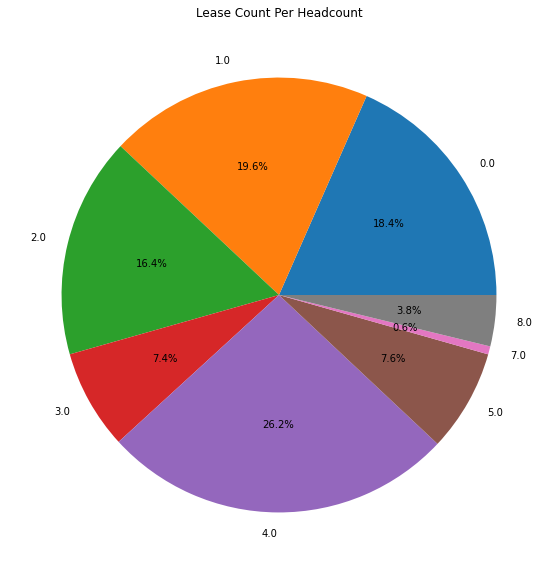

In [14]:
merged_df.groupby(["COUNT"])["CSAT_RATING"].count().plot(kind="pie", autopct="%1.1f%%", figsize=(10, 10))
plt.ylabel("")
plt.title("Lease Count Per Headcount")

In [41]:
lease_count_df =merged_df.groupby(['COUNT'])['CSAT_RATING'].count().reset_index()
lease_count_df.rename(
    columns={
        "COUNT": "HEADCOUNT",
        "CSAT_RATING": "LEASE_COUNT",
    }, 
    inplace=True,
)
lease_count_df

,HEADCOUNT,LEASE_COUNT
0,0.0,92
1,1.0,98
2,2.0,82
3,3.0,37
4,4.0,131
5,5.0,38
6,7.0,3
7,8.0,19


In [16]:
df["LEASE_COUNT"] = lease_count_df["CSAT_RATING"]
df

,HEADCOUNT,CSAT_RATING,LEASE_COUNT
0,0.0,4.293478,92
1,1.0,4.173469,98
2,2.0,4.243902,82
3,3.0,4.459459,37
4,4.0,3.732824,131
5,5.0,3.868421,38
6,7.0,5.000000,3
7,8.0,3.684211,19


## Correlation and Regression

Value of r: -0.07884596731390989


Text(0, 0.5, 'Average CSAT rating')

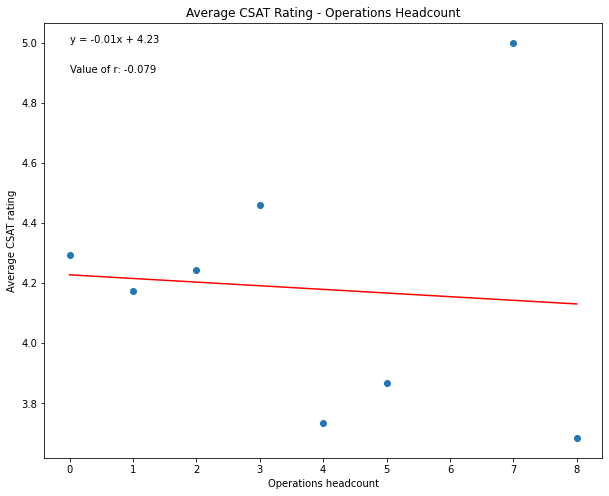

In [38]:
# Calculate the correlation coefficient and linear regression model 
x = df["HEADCOUNT"]
y = df["CSAT_RATING"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x, y)
regress_values = x * slope + intercept
line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
plt.figure(figsize=(10, 8))
plt.scatter(x, y)
plt.plot(x, regress_values, "r-")
plt.annotate(line_eq, xy=(0,5))
plt.annotate(f"Value of r: {round(rvalue,3)}", xy=(0, 4.9))
# print(f"Value of r: {rvalue}")
plt.title("Average CSAT Rating - Operations Headcount")
plt.xlabel("Operations headcount")
plt.ylabel("Average CSAT rating")

- r value is -0.078, the Correlation is none or weak, almost none

## Remove count = 7 data
- because there is only 3.
- The data of headcount = 7 takes only 0.6%

In [19]:
df2 = df[df["HEADCOUNT"] != 7]
df2

,HEADCOUNT,CSAT_RATING,LEASE_COUNT
0,0.0,4.293478,92
1,1.0,4.173469,98
2,2.0,4.243902,82
3,3.0,4.459459,37
4,4.0,3.732824,131
5,5.0,3.868421,38
7,8.0,3.684211,19


Text(0, 0.5, 'Average CSAT rating')

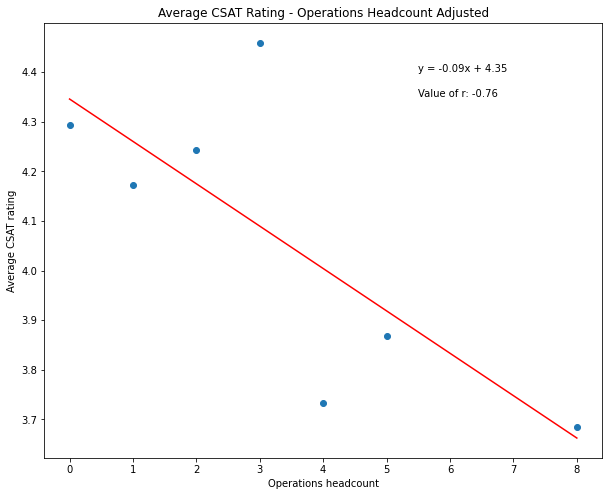

In [36]:
x = df2["HEADCOUNT"]
y = df2["CSAT_RATING"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x, y)
regress_values = x * slope + intercept
line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
plt.figure(figsize=(10, 8))
plt.scatter(x, y)
plt.plot(x, regress_values, "r-")
plt.annotate(line_eq, xy=(5.5, 4.4))
plt.annotate(f"Value of r: {round(rvalue,2)}", xy=(5.5, 4.35))
# print(f"Value of r: {round(rvalue,2)}")
plt.title("Average CSAT Rating - Operations Headcount Adjusted")
plt.xlabel("Operations headcount")
plt.ylabel("Average CSAT rating")

#### Observation
- r value is -0.76 
- there is strong correlation between headcount and average CSAT score
- The more headcount, the lower CSAT rating